In [1]:
# load helper functions
%run MB_thresholding_helper_functions.py

In [2]:
# data loading
expt_name = 'Ecad-bcat_prostate' # name of experiment folder

# replace /path/to/folder/ below with path to experiment folder
dir_path = '/path/to/folder/'
root_dir = dir_path + expt_name + '/'

name_dual = 'Ecad-bcat'
name_anti1 = 'Ecad'
name_anti2 = 'bcat'

slides_anti1 = ['M']
slides_anti2 = ['R']
slides_dual = ['MR']

# intensity measure on which to base thresholding
intensity = 'IntegratedIntensity'

# note: although the code below uses the term "cell",
# the final collation of the data is at the image/tissue level
# the user should add the three csv files read in below to the experiment folder
cells_df = pd.read_csv(root_dir + 'Ecad-bcat_prostate_Both_Cells.csv', decimal='.', sep=",")
blobs_df = pd.read_csv(root_dir + 'Ecad-bcat_prostate_BlobsInCells.csv', decimal='.', sep=",")
image_df = pd.read_csv(root_dir + 'Ecad-bcat_prostate_Image.csv', decimal='.', sep=",")

# note: if any of the three file shapes below have only one column it mean the csv was saved with a ',' for the decimal
print('cells df shape = ' + str(cells_df.shape))
print('blobs df shape = ' + str(blobs_df.shape))
print('image df shape = ' + str(image_df.shape))

cells df shape = (223997, 9)
blobs df shape = (223997, 56)
image df shape = (27, 175)


In [3]:
# extract required metadata
meta = image_df[['ImageNumber', 'Metadata_Slide']]
meta

,ImageNumber,Metadata_Slide
0,1,MR
1,2,MR
2,3,MR
3,4,M
4,5,M
5,6,M
6,7,R
7,8,R
8,9,R
9,10,MR


In [4]:
# checking image numbers in cells and blobs dataframes match those in the metadata
print(set(blobs_df['ImageNumber']))
print(set(cells_df['ImageNumber']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}


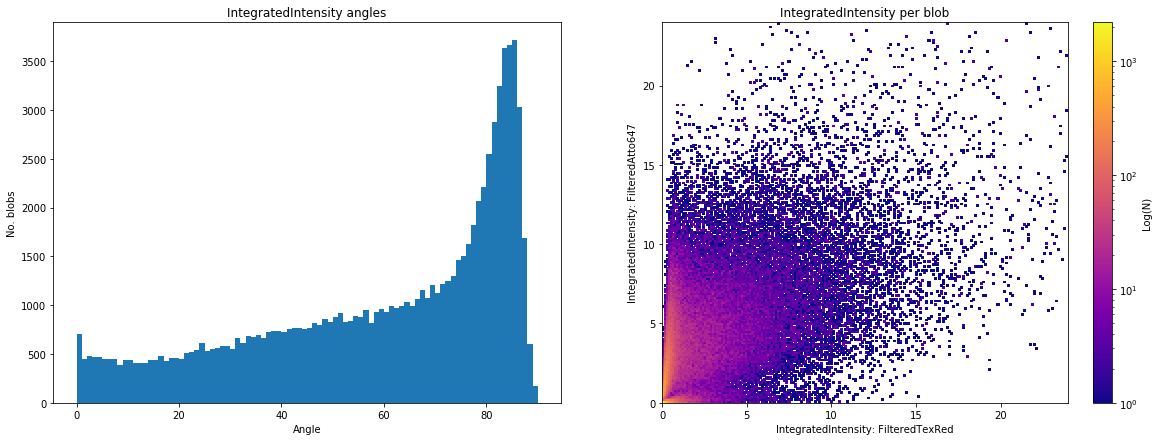

In [5]:
# extracting image numbers for each staining condition
# 'anti1' = antibody 1 (Mouse)
# 'anti2' = antibody 2 (Rabbit)
# 'dual' = both antibodies
meta_dual = meta.loc[meta['Metadata_Slide'].isin(slides_dual)]
imnum_dual = meta_dual['ImageNumber'].astype(int)
blobs_dual = blobs_df.loc[blobs_df['ImageNumber'].isin(list(imnum_dual))]
cells_dual = cells_df.loc[cells_df['ImageNumber'].isin(list(imnum_dual))]
x_dual = blobs_dual['Intensity_' + intensity + '_FilteredTexRed'].reset_index(drop=True)
y_dual = blobs_dual['Intensity_' + intensity + '_FilteredAtto647'].reset_index(drop=True)
angles_dual = compute_angles(x_dual, y_dual)
plotter_initial(x_dual, y_dual, angles_dual, intensity, bins=90)

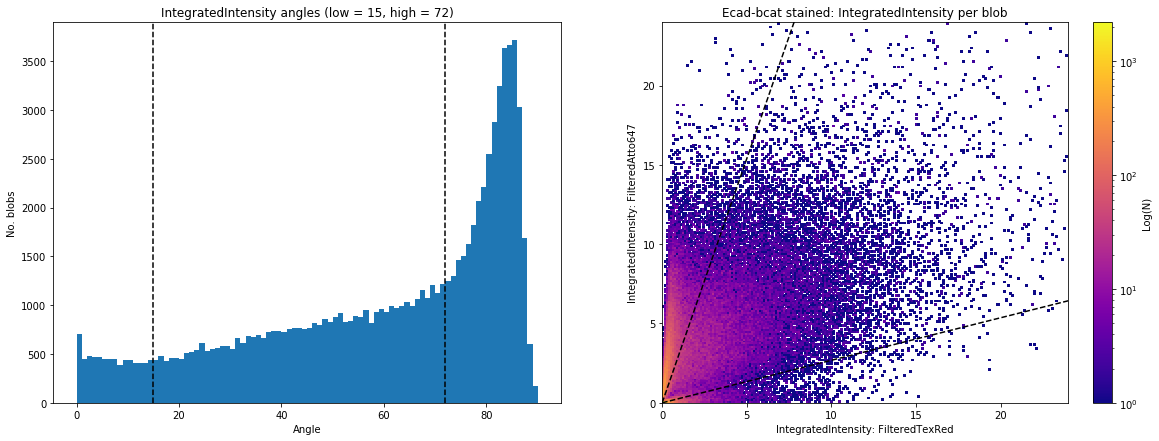

In [6]:
# setting thresholds for dual stained cells
low = 15
high = 72
plotter_thresholds(x_dual, y_dual, angles_dual, intensity, bins=90, low=low, high=high,
                   name=name_dual, dir_path=dir_path, expt_name=expt_name)

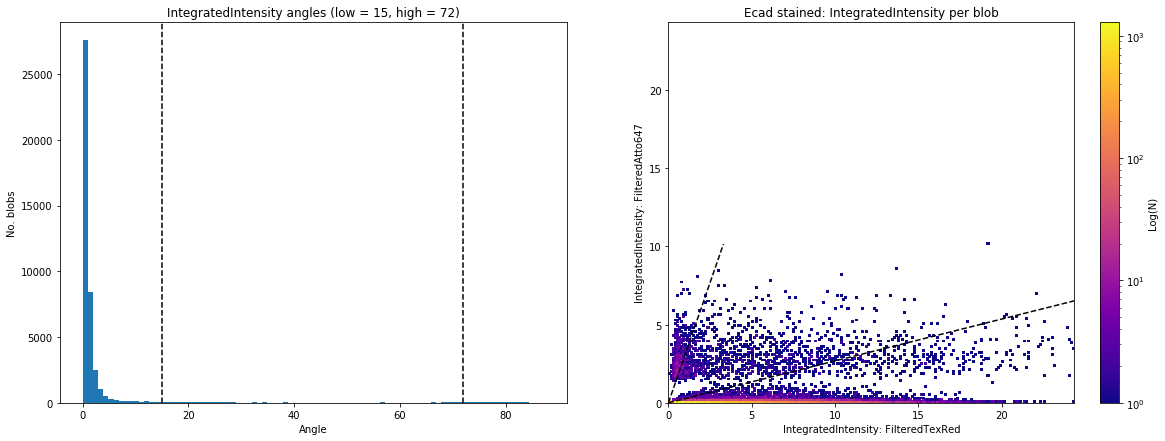

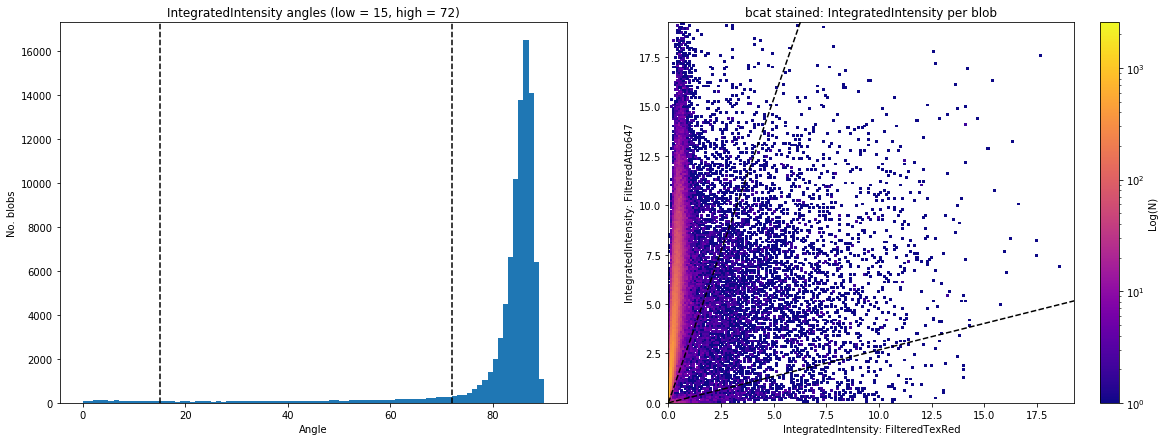

In [7]:
# making dual dataframe, based on thresholds set above
dual_df = df_maker_tissues(angles_dual, cells_dual, condition=name_dual, low=low, high=high)

# applying dual set thresholds to the individually stained cases
meta_anti1 = meta.loc[meta['Metadata_Slide'].isin(slides_anti1)]
imnum_anti1 = meta_anti1['ImageNumber'].astype(int)
blobs_anti1 = blobs_df.loc[blobs_df['ImageNumber'].isin(list(imnum_anti1))]
cells_anti1 = cells_df.loc[cells_df['ImageNumber'].isin(list(imnum_anti1))]
x_anti1 = blobs_anti1['Intensity_' + intensity + '_FilteredTexRed'].reset_index(drop=True)
y_anti1 = blobs_anti1['Intensity_' + intensity + '_FilteredAtto647'].reset_index(drop=True)
angles_anti1 = compute_angles(x_anti1, y_anti1)
plotter_thresholds(x_anti1, y_anti1, angles_anti1, intensity, bins=90, low=low, high=high,
                   name=name_anti1, dir_path=dir_path, expt_name=expt_name)
anti1_df = df_maker_tissues(angles_anti1, cells_anti1, condition=name_anti1, low=low, high=high)

meta_anti2 = meta.loc[meta['Metadata_Slide'].isin(slides_anti2)]
imnum_anti2 = meta_anti2['ImageNumber'].astype(int)
blobs_anti2 = blobs_df.loc[blobs_df['ImageNumber'].isin(list(imnum_anti2))]
cells_anti2 = cells_df.loc[cells_df['ImageNumber'].isin(list(imnum_anti2))]
x_anti2 = blobs_anti2['Intensity_' + intensity + '_FilteredTexRed'].reset_index(drop=True)
y_anti2 = blobs_anti2['Intensity_' + intensity + '_FilteredAtto647'].reset_index(drop=True)
angles_anti2 = compute_angles(x_anti2, y_anti2)
plotter_thresholds(x_anti2, y_anti2, angles_anti2, intensity, bins=90, low=low, high=high,
                   name=name_anti2, dir_path=dir_path, expt_name=expt_name)
anti2_df = df_maker_tissues(angles_anti2, cells_anti2, condition=name_anti2, low=low, high=high)

In [8]:
# save final dataframe for plotting in R
final_df = pd.concat([dual_df, anti1_df, anti2_df], ignore_index=True, sort=False)
final_df.to_csv(dir_path + expt_name + '_' + intensity + '.csv', index=False)